### DATA CLEANING & PREPARATION
<p> We used this dataset: https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("CreditScoring.csv")

In [3]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.columns = df.columns.str.lower()

<p> We map the categorical values to string values

In [5]:
df.status = df.status.map({
    1: "ok",
    2: "default",
    0: "unk"
})

In [6]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

marital_values = {
    1: 'single', 
    2: 'married', 
    3: 'widow', 
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

job_values = {
    1: 'fixed', 
    2: 'partime', 
    3: 'freelance', 
    4: 'others',
    0: 'unk'
}

In [7]:
df.home = df.home.map(home_values)
df.marital = df.marital.map(marital_values)
df.records = df.records.map(records_values)
df.job = df.job.map(job_values)

In [8]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [9]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [10]:
df.income.replace(to_replace=99999999, value=np.nan).max()

np.float64(959.0)

In [11]:
col_to_replace = ["income", "assets", "debt"]
for c in col_to_replace:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [12]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


<p> Let's delete the unknown status row

In [13]:
df[df.status == "unk"]

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3309,unk,10,private,60,25,single,no,fixed,35,148.0,3000.0,0.0,1500,1888


In [14]:
df = df[df.status != "unk"].reset_index(drop=True)

In [15]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4450,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4451,default,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4452,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


<p> Let's split datasets for train/val/test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=21)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=21)

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

<p> Let's convert our status to int (default = 1)

In [19]:
y_train = (df_train.status == "default").astype(int).values
y_val = (df_val.status == "default").astype(int).values
y_test = (df_test.status == "default").astype(int).values

In [20]:
del df_train['status']
del df_val['status']
del df_test['status']

In [21]:
df_train.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,5,rent,48,31,married,no,fixed,70,247.0,0.0,0.0,900,1039
1,1,parents,60,22,single,no,fixed,35,90.0,0.0,0.0,1250,1590
2,0,parents,24,20,single,no,partime,35,66.0,0.0,0.0,550,550
3,0,rent,48,35,married,no,fixed,66,206.0,0.0,0.0,1500,1683
4,11,owner,48,34,married,yes,fixed,90,198.0,4500.0,0.0,1650,2165


In [22]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

### INTRODUCTION TO TREES

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [24]:
train_dicts = df_train.fillna(0).to_dict(orient='records')
train_dicts[0]

{'seniority': 5,
 'home': 'rent',
 'time': 48,
 'age': 31,
 'marital': 'married',
 'records': 'no',
 'job': 'fixed',
 'expenses': 70,
 'income': 247.0,
 'assets': 0.0,
 'debt': 0.0,
 'amount': 900,
 'price': 1039}

In [25]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [26]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [27]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
val_dicts = df_val.fillna(0).to_dict(orient="records")
X_val = dv.transform(val_dicts)

In [29]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [30]:
roc_auc_score(y_val, y_pred)

np.float64(0.6541927325155175)

<p> Let's look at training data to predict the score

In [31]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

np.float64(1.0)

<p> This model is overfitted, the model simply memorized the data but fails to generalize or predict when new data is used with the model
<p> This is because the tree has not specified max depth
<p> Let's try specifying max depth

In [32]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [33]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print("train dataset:", auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print("val dataset:", auc)

train dataset: 0.7736648639513267
val dataset: 0.7490744587263574


<p> The auc score is already better & the model is not overfitted

<p> A 1 max depth tree is called a decision stump, cause it is just not a tree

<p> We can also visualize our tree

In [34]:
from sklearn.tree import export_text

In [35]:
print(export_text(dt))

|--- feature_25 <= 0.50
|   |--- feature_27 <= 4.50
|   |   |--- feature_27 <= 1.50
|   |   |   |--- class: 1
|   |   |--- feature_27 >  1.50
|   |   |   |--- class: 1
|   |--- feature_27 >  4.50
|   |   |--- feature_12 <= 109.50
|   |   |   |--- class: 1
|   |   |--- feature_12 >  109.50
|   |   |   |--- class: 0
|--- feature_25 >  0.50
|   |--- feature_27 <= 2.50
|   |   |--- feature_12 <= 87.50
|   |   |   |--- class: 1
|   |   |--- feature_12 >  87.50
|   |   |   |--- class: 0
|   |--- feature_27 >  2.50
|   |   |--- feature_12 <= 72.50
|   |   |   |--- class: 0
|   |   |--- feature_12 >  72.50
|   |   |   |--- class: 0



In [36]:
names = dv.get_feature_names_out().tolist()
print(export_text(dt, feature_names=names))

|--- records=no <= 0.50
|   |--- seniority <= 4.50
|   |   |--- seniority <= 1.50
|   |   |   |--- class: 1
|   |   |--- seniority >  1.50
|   |   |   |--- class: 1
|   |--- seniority >  4.50
|   |   |--- income <= 109.50
|   |   |   |--- class: 1
|   |   |--- income >  109.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- seniority <= 2.50
|   |   |--- income <= 87.50
|   |   |   |--- class: 1
|   |   |--- income >  87.50
|   |   |   |--- class: 0
|   |--- seniority >  2.50
|   |   |--- income <= 72.50
|   |   |   |--- class: 0
|   |   |--- income >  72.50
|   |   |   |--- class: 0



### DECISION TREE LEARNING

What are the criteria?
1. Find the best split -> for one feature, eg: assets
2. Stop if max depth is reached
3. If group is still sufficiently large & not pure: repeat for both left & right

Stopping criteria:
1. Group is already pure -> 0 impurity -> all records are of the same output
2. Tree reached max depth
3. Group too small to split -> to avoid overfitting

There are many ways to measure impurity, one is misclassification rate

### DECISION TREE TUNING

Let's conduct experiment with tree deptsh

In [37]:
depths = [1,2,3,4,5,6,7,8,10,15,20,25,None]

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (d, auc))

   1 -> 0.606
   2 -> 0.698
   3 -> 0.749
   4 -> 0.770
   5 -> 0.784
   6 -> 0.771
   7 -> 0.734
   8 -> 0.711
  10 -> 0.683
  15 -> 0.656
  20 -> 0.654
  25 -> 0.655
None -> 0.633


We observed that max depth 4,5,6 yields the best result<br>
Now let's also include min_samples_leaf as a parameter

In [38]:
scores = []

for d in [4,5,6]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d,s,auc))

        # print('%s , %4d -> %.3f' % (s,d,auc))


In [39]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.770496
1,4,2,0.770496
2,4,5,0.770496
3,4,10,0.770496
4,4,15,0.770496


In [40]:
df_scores.sort_values(by="auc", ascending=False).head()

,max_depth,min_samples_leaf,auc
22,6,15,0.799820
23,6,20,0.795797
21,6,10,0.795034
13,5,15,0.791142
14,5,20,0.790250


We see that with max depth of 6 and min samples leaf of 15, we yields the most accurate model

In [41]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.770  0.784  0.776
2                 0.770  0.784  0.774
5                 0.770  0.787  0.787
10                0.770  0.790  0.795
15                0.770  0.791  0.800
20                0.773  0.790  0.796
100               0.768  0.785  0.785
200               0.756  0.768  0.769
500               0.692  0.692  0.692

In [42]:
import seaborn as sns

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

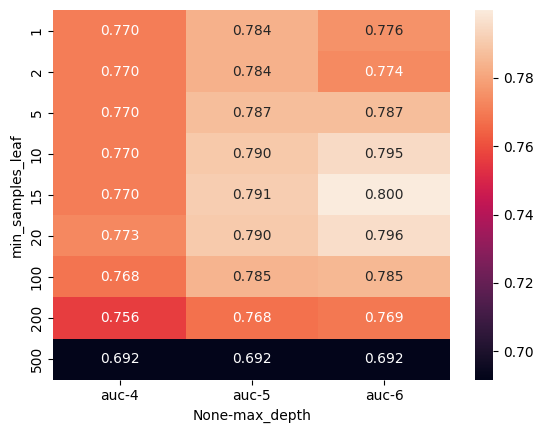

In [43]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

Let's try with more max_depths options

In [44]:
scores = []

for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d,s,auc))

        # print('%s , %4d -> %.3f' % (s,d,auc))


In [45]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.651  0.770  0.784  0.779  0.734  0.705  0.649  0.643
2                 0.701  0.770  0.784  0.774  0.753  0.711  0.683  0.673
5                 0.752  0.770  0.781  0.787  0.783  0.748  0.751  0.743
10                0.783  0.770  0.790  0.795  0.798  0.787  0.785  0.783
15                0.796  0.770  0.791  0.800  0.797  0.793  0.793  0.798
20                0.797  0.773  0.790  0.796  0.801  0.801  0.800  0.799
100               0.786  0.768  0.785  0.785  0.787  0.786  0.786  0.786
200               0.769  0.756  0.768  0.769  0.769  0.769  0.769  0.769
500               0.692  0.692  0.692  0.692  0.692  0.692  0.692  0.692

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

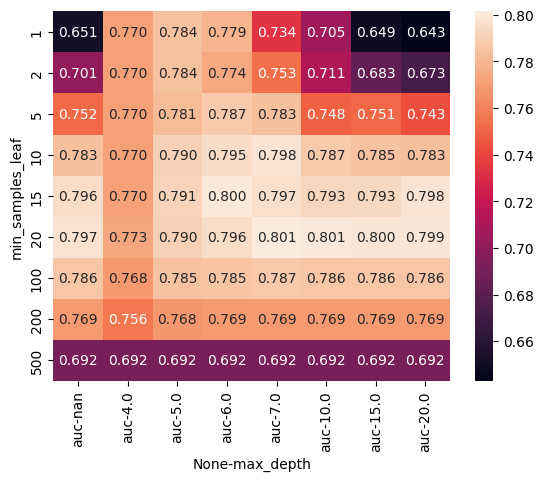

In [46]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

### RANDOM FOREST
<p> A type of ensemble model -> multiple model as board of experts, in random forest, each of this model get random subset of features, hence the word random multiple tree, each of the model is also independent of each other

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf = RandomForestClassifier(n_estimators=10, random_state=24) # number of models
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=24)

In [49]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.8005260006842285)

<p> We can tune the model, let's go with multiple n_estimators alue

In [50]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((n, auc))

In [51]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

In [52]:
df_scores.sort_values(by="auc", ascending=False)

,n_estimators,auc
18,190,0.835174
19,200,0.835098
17,180,0.834997
16,170,0.834463
15,160,0.834130
14,150,0.833751
10,110,0.833699
11,120,0.833271
12,130,0.832978
13,140,0.832764


In [53]:
import matplotlib.pyplot as plt

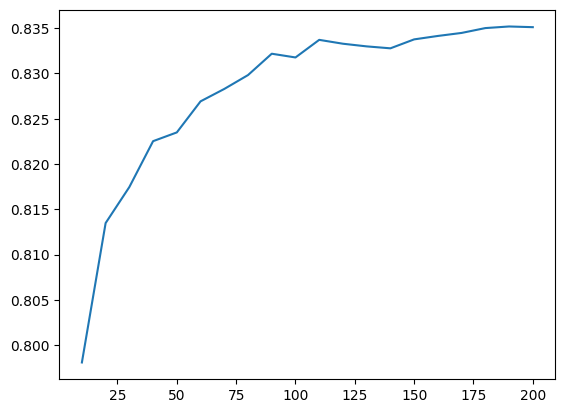

In [54]:
plt.plot(df_scores.n_estimators, df_scores.auc)

<p> Welp for my case, the n_estimator of 100 seems to be the sweet spot, anymore & the gain is insignificant
<p> Now lets also try max depth for the tree

In [55]:
scores = []
 
for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)
 
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
 
        scores.append((d, n, auc))
 
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.815750
1,5,20,0.823634
2,5,30,0.829215
3,5,40,0.829685
4,5,50,0.830751


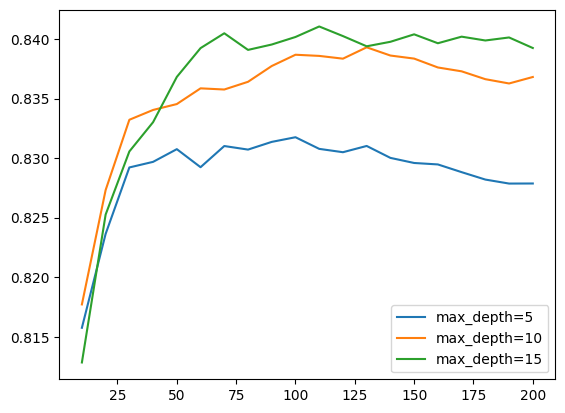

In [56]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
     
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)
 
plt.legend()

<p> We see from here the good parameters are max_depth=15 & n_estimators=75

In [57]:
max_depth=15

<p> Now lets try min_samples_leaf

In [58]:
scores = []
 
for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    random_state=1,
                                    min_samples_leaf=s)
        rf.fit(X_train, y_train)
 
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
 
        scores.append((s, n, auc))
 
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.812836
1,1,20,0.825256
2,1,30,0.830559
3,1,40,0.833018
4,1,50,0.836818


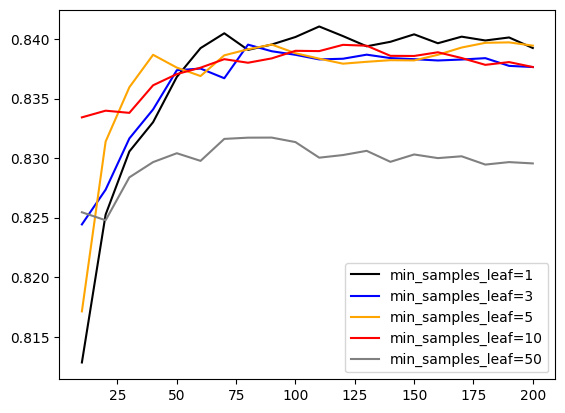

In [59]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
 
for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
     
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)
 
plt.legend()

<p> Best min_samples_leaf = 5 with 40 n_estimators

In [60]:
min_samples_leaf = 5

In [61]:
rf = RandomForestClassifier(n_estimators=40, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=40,
                       n_jobs=-1, random_state=1)

In [62]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.8386747959532771)

### Gradient Boosting
<p> Different than random forest -> trees are independent
<p> This ensemble takes the error from previous model to train a new model -> the goal is to reduce error rate from the previous model

In [63]:
import xgboost as xgb

In [64]:
features = list(dv.get_feature_names_out())

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [65]:
#these are mostly default values from xgb
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'nthread': 8,
     
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round= 10)

In [66]:
y_pred = model.predict(dval)

In [67]:
roc_auc_score(y_val, y_pred)

np.float64(0.8290803235423488)

<p> Now let's tune the model a little

In [68]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [69]:
# let's also set eval_metrics to auc
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

# we can pass watchlist, to show log for each iteration of model
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

[0]	train-auc:0.86424	val-auc:0.78253
[1]	train-auc:0.88575	val-auc:0.80139
[2]	train-auc:0.89902	val-auc:0.81316
[3]	train-auc:0.91307	val-auc:0.81903
[4]	train-auc:0.91869	val-auc:0.82226
[5]	train-auc:0.92603	val-auc:0.82233
[6]	train-auc:0.93480	val-auc:0.82424
[7]	train-auc:0.93754	val-auc:0.82667
[8]	train-auc:0.94278	val-auc:0.82660
[9]	train-auc:0.94844	val-auc:0.82908
[10]	train-auc:0.95149	val-auc:0.82749
[11]	train-auc:0.95559	val-auc:0.83016
[12]	train-auc:0.95819	val-auc:0.82874
[13]	train-auc:0.96054	val-auc:0.82853
[14]	train-auc:0.96278	val-auc:0.82979
[15]	train-auc:0.96436	val-auc:0.82944
[16]	train-auc:0.96561	val-auc:0.82915
[17]	train-auc:0.96790	val-auc:0.83042
[18]	train-auc:0.96904	val-auc:0.83078
[19]	train-auc:0.97122	val-auc:0.83029
[20]	train-auc:0.97343	val-auc:0.82979
[21]	train-auc:0.97512	val-auc:0.83036
[22]	train-auc:0.97783	val-auc:0.82869
[23]	train-auc:0.97797	val-auc:0.82858
[24]	train-auc:0.97825	val-auc:0.82825
[25]	train-auc:0.97902	val-auc:0.82

<p> The 1 score for train auc is likely overfitted, the val auc rises to one point and starts to fall,

In [70]:
eval_results = {}

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

# verbose eval to 5
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist,
                  evals_result=eval_results)

[0]	train-auc:0.86424	val-auc:0.78253


[5]	train-auc:0.92603	val-auc:0.82233
[10]	train-auc:0.95149	val-auc:0.82749
[15]	train-auc:0.96436	val-auc:0.82944
[20]	train-auc:0.97343	val-auc:0.82979
[25]	train-auc:0.97902	val-auc:0.82785
[30]	train-auc:0.98413	val-auc:0.82780
[35]	train-auc:0.98907	val-auc:0.82542
[40]	train-auc:0.99124	val-auc:0.82614
[45]	train-auc:0.99316	val-auc:0.82332
[50]	train-auc:0.99527	val-auc:0.82601
[55]	train-auc:0.99675	val-auc:0.82368
[60]	train-auc:0.99767	val-auc:0.82479
[65]	train-auc:0.99861	val-auc:0.82688
[70]	train-auc:0.99887	val-auc:0.82479
[75]	train-auc:0.99932	val-auc:0.82350
[80]	train-auc:0.99951	val-auc:0.82138
[85]	train-auc:0.99972	val-auc:0.82118
[90]	train-auc:0.99985	val-auc:0.82082
[95]	train-auc:0.99991	val-auc:0.81996
[100]	train-auc:0.99995	val-auc:0.81982
[105]	train-auc:0.99996	val-auc:0.81889
[110]	train-auc:0.99997	val-auc:0.81829
[115]	train-auc:0.99998	val-auc:0.81776
[120]	train-auc:0.99998	val-auc:0.81752
[125]	train-auc:1.00000	val-auc:0.81879
[130]	train-auc:1.00

<p> By eyeballing we can see, the optimal auc score for val is around 20 iterations & consistently falling as train auc rises to 1

In [71]:
columns = ['iter', 'train_auc', 'val_auc']
train_aucs = list(eval_results['train'].values())[0]
val_aucs = list(eval_results['val'].values())[0]

df_scores = pd.DataFrame(
    list(zip(
        range(1, len(train_aucs)+1),
        train_aucs,
        val_aucs
    )
    ), columns=columns
)

In [72]:
df_scores.sort_values(by='val_auc', ascending=False)

,iter,train_auc,val_auc
18,19,0.969037,0.830776
17,18,0.967896,0.830418
21,22,0.975118,0.830360
19,20,0.971221,0.830287
11,12,0.955588,0.830165
...,...,...,...
193,194,1.000000,0.816034
188,189,1.000000,0.815961
2,3,0.899022,0.813160
1,2,0.885750,0.801387


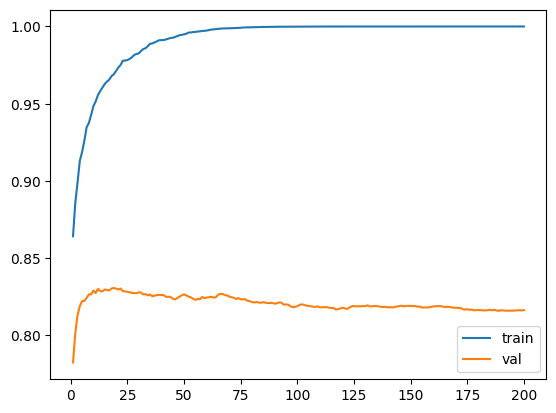

In [73]:
plt.plot(df_scores.iter, df_scores.train_auc, label='train')
plt.plot(df_scores.iter, df_scores.val_auc, label='val')
plt.legend()

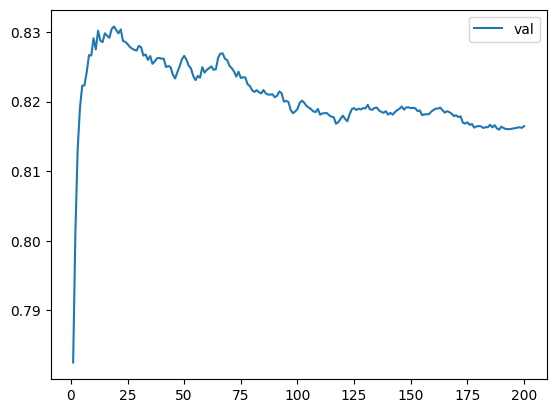

In [74]:
plt.plot(df_scores.iter, df_scores.val_auc, label='val')
plt.legend()

<p> We see that around 20 iterations, it reach optimal auc score

### XGB Tuning
<p> We can tune the parameters with this order<br>
1. ETA <br>
2. Max depth <br>
3. Min child weight

In [96]:
scores = {}

In [107]:
eval_results = {}

xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

# verbose eval to 5
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist,
                  evals_result=eval_results)

[0]	train-auc:0.86424	val-auc:0.78253


[5]	train-auc:0.88621	val-auc:0.79752
[10]	train-auc:0.89869	val-auc:0.81346
[15]	train-auc:0.90727	val-auc:0.82023
[20]	train-auc:0.91459	val-auc:0.82138
[25]	train-auc:0.92041	val-auc:0.82424
[30]	train-auc:0.92812	val-auc:0.82600
[35]	train-auc:0.93388	val-auc:0.82699
[40]	train-auc:0.93818	val-auc:0.82855
[45]	train-auc:0.94167	val-auc:0.82937
[50]	train-auc:0.94560	val-auc:0.83038
[55]	train-auc:0.94834	val-auc:0.83107
[60]	train-auc:0.95178	val-auc:0.83228
[65]	train-auc:0.95501	val-auc:0.83341
[70]	train-auc:0.95740	val-auc:0.83340
[75]	train-auc:0.95952	val-auc:0.83294
[80]	train-auc:0.96203	val-auc:0.83377
[85]	train-auc:0.96403	val-auc:0.83360
[90]	train-auc:0.96604	val-auc:0.83382
[95]	train-auc:0.96731	val-auc:0.83387
[100]	train-auc:0.96860	val-auc:0.83348
[105]	train-auc:0.96969	val-auc:0.83299
[110]	train-auc:0.97081	val-auc:0.83239
[115]	train-auc:0.97232	val-auc:0.83272
[120]	train-auc:0.97378	val-auc:0.83252
[125]	train-auc:0.97505	val-auc:0.83261
[130]	train-auc:0.97

In [108]:
columns = ['iter', 'train_auc', 'val_auc']
train_aucs = list(eval_results['train'].values())[0]
val_aucs = list(eval_results['val'].values())[0]

df_scores = pd.DataFrame(
    list(zip(
        range(len(train_aucs)),
        train_aucs,
        val_aucs
    )
    ), columns=columns
)

In [109]:
df_scores = df_scores[df_scores.iter % 5 == 0]

In [110]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = df_scores

In [111]:
scores.keys()

dict_keys(['eta=0.3', 'eta=0.1', 'eta=1.0', 'eta=0.05'])

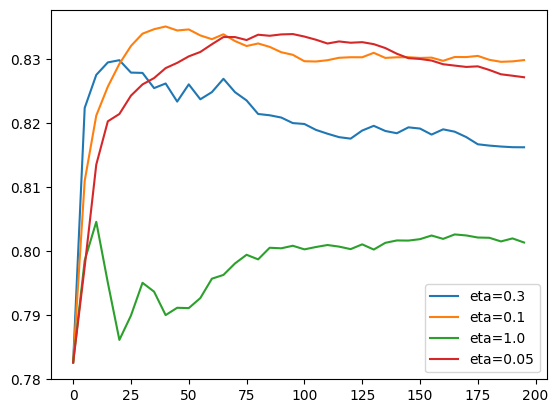

In [113]:
for key, df_score in scores.items():
    plt.plot(df_score.iter, df_score.val_auc, label=key)
plt.legend()

<p> We see here the learning rate of 1.0 is quickly overfitted, and the default value of 0.3 is not the best
<p> Rate of 0.1 & 0.05 takes smilar course, with 0.1 learning quicker and also reaching maximum faster than 0.05

(0.82, 0.84)

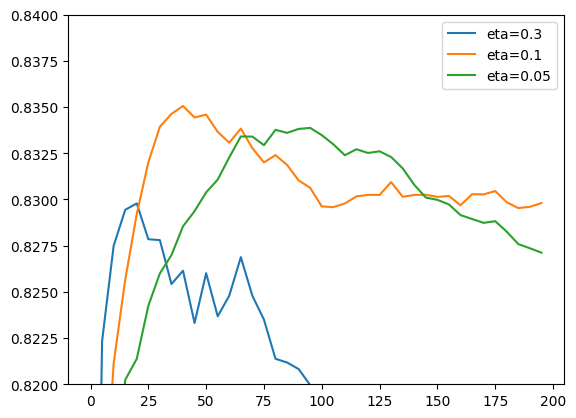

In [116]:
etas = ['eta=0.3', 'eta=0.1', 'eta=0.05']
for eta in etas:
    plt.plot(scores[eta].iter, scores[eta].val_auc, label=eta)
plt.legend()
plt.ylim(0.82, 0.84)

<p> Now let's tune the max depth

In [126]:
eval_results = {}

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

# verbose eval to 5
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist,
                  evals_result=eval_results)

[0]	train-auc:0.93106	val-auc:0.75902
[5]	train-auc:0.96659	val-auc:0.79534
[10]	train-auc:0.97982	val-auc:0.80120
[15]	train-auc:0.98886	val-auc:0.80828
[20]	train-auc:0.99353	val-auc:0.81287
[25]	train-auc:0.99623	val-auc:0.81984
[30]	train-auc:0.99755	val-auc:0.81980
[35]	train-auc:0.99845	val-auc:0.81983
[40]	train-auc:0.99913	val-auc:0.82129
[45]	train-auc:0.99952	val-auc:0.82307
[50]	train-auc:0.99968	val-auc:0.82260
[55]	train-auc:0.99979	val-auc:0.82370
[60]	train-auc:0.99986	val-auc:0.82430
[65]	train-auc:0.99990	val-auc:0.82446
[70]	train-auc:0.99994	val-auc:0.82513
[75]	train-auc:0.99996	val-auc:0.82492
[80]	train-auc:0.99997	val-auc:0.82465
[85]	train-auc:0.99998	val-auc:0.82410
[90]	train-auc:0.99999	val-auc:0.82501
[95]	train-auc:0.99999	val-auc:0.82505
[100]	train-auc:0.99999	val-auc:0.82500
[105]	train-auc:1.00000	val-auc:0.82522
[110]	train-auc:1.00000	val-auc:0.82444
[115]	train-auc:1.00000	val-auc:0.82420
[120]	train-auc:1.00000	val-auc:0.82420
[125]	train-auc:1.0000

In [127]:
columns = ['iter', 'train_auc', 'val_auc']
train_aucs = list(eval_results['train'].values())[0]
val_aucs = list(eval_results['val'].values())[0]

df_scores = pd.DataFrame(
    list(zip(
        range(len(train_aucs)),
        train_aucs,
        val_aucs
    )
    ), columns=columns
)

df_scores = df_scores[df_scores.iter % 5 == 0]

In [128]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = df_scores

In [134]:
scores.keys()

dict_keys(['max_depth=6', 'max_depth=3', 'max_depth=4', 'max_depth=10'])

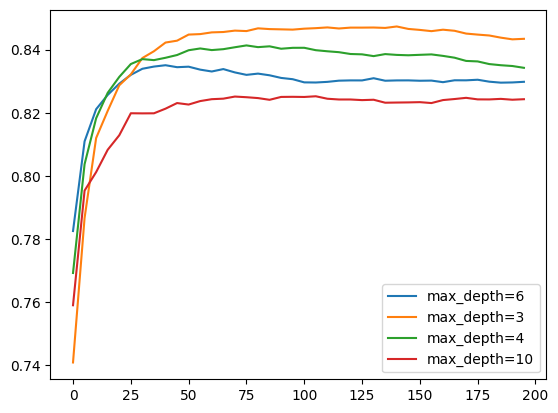

In [135]:
for key, df_score in scores.items():
    plt.plot(df_score.iter, df_score.val_auc, label=key)
plt.legend()

<p> Let's takeout max depth 10

(0.82, 0.85)

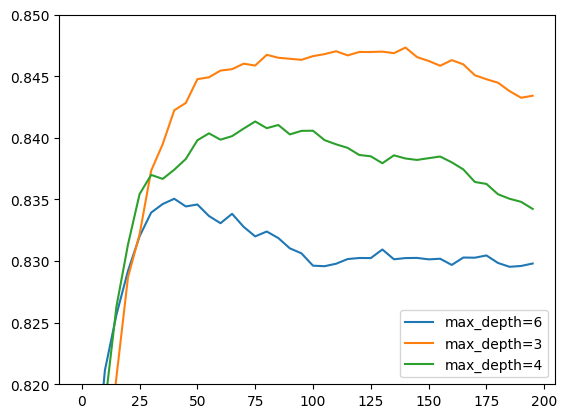

In [139]:
etas = ['max_depth=6', 'max_depth=3', 'max_depth=4']
for eta in etas:
    plt.plot(scores[eta].iter, scores[eta].val_auc, label=eta)
plt.legend()
plt.ylim(0.82, 0.85)

<p> Seems like depth of 3 yields the best auc scores and peaked at about 75/150 iterations
<p> Now lets' tune min child weight>

In [155]:
# scores = {}
eval_results = {}

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 10,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

# verbose eval to 5
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist,
                  evals_result=eval_results)

[0]	train-auc:0.77497	val-auc:0.74253
[5]	train-auc:0.81188	val-auc:0.78672
[10]	train-auc:0.84490	val-auc:0.81248
[15]	train-auc:0.85187	val-auc:0.82055
[20]	train-auc:0.86165	val-auc:0.82865
[25]	train-auc:0.86931	val-auc:0.83351
[30]	train-auc:0.87337	val-auc:0.83518
[35]	train-auc:0.87825	val-auc:0.83776
[40]	train-auc:0.88111	val-auc:0.84010
[45]	train-auc:0.88449	val-auc:0.84280
[50]	train-auc:0.88682	val-auc:0.84417
[55]	train-auc:0.88881	val-auc:0.84568
[60]	train-auc:0.89023	val-auc:0.84679
[65]	train-auc:0.89122	val-auc:0.84719
[70]	train-auc:0.89265	val-auc:0.84739
[75]	train-auc:0.89435	val-auc:0.84814
[80]	train-auc:0.89491	val-auc:0.84874
[85]	train-auc:0.89606	val-auc:0.85017
[90]	train-auc:0.89700	val-auc:0.85005
[95]	train-auc:0.89802	val-auc:0.85106
[100]	train-auc:0.89913	val-auc:0.85073
[105]	train-auc:0.89980	val-auc:0.85094
[110]	train-auc:0.90082	val-auc:0.85095
[115]	train-auc:0.90157	val-auc:0.85119
[120]	train-auc:0.90284	val-auc:0.85078
[125]	train-auc:0.9034

In [156]:
columns = ['iter', 'train_auc', 'val_auc']
train_aucs = list(eval_results['train'].values())[0]
val_aucs = list(eval_results['val'].values())[0]

df_scores = pd.DataFrame(
    list(zip(
        range(len(train_aucs)),
        train_aucs,
        val_aucs
    )
    ), columns=columns
)

df_scores = df_scores[df_scores.iter % 5 == 0]

In [157]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = df_scores

In [158]:
scores.keys()

dict_keys(['min_child_weight=30', 'min_child_weight=1', 'min_child_weight=10'])

(0.83, 0.855)

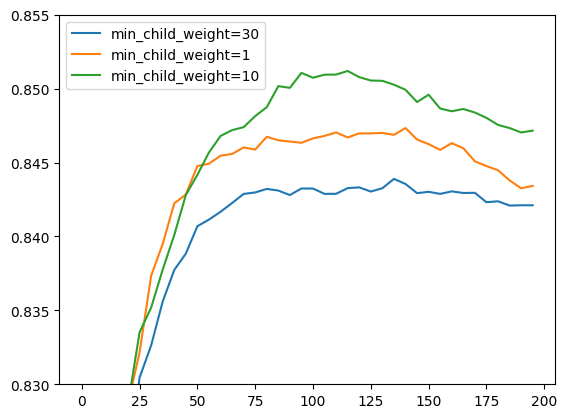

In [163]:
for key, df_score in scores.items():
    plt.plot(df_score.iter, df_score.val_auc, label=key)
plt.legend()
plt.ylim(0.83, 0.855)

<p> We found min_child_weight=10 is the best

<p> Now let's train our best model based on the tuned parameters: eta=0.1, max_depth=3 & min_child_weight = 10, also iterations of 100

In [164]:
eval_results = {}

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 10,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

# verbose eval to 5
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist,
                  evals_result=eval_results)

[0]	train-auc:0.77497	val-auc:0.74253
[5]	train-auc:0.81188	val-auc:0.78672
[10]	train-auc:0.84490	val-auc:0.81248
[15]	train-auc:0.85187	val-auc:0.82055
[20]	train-auc:0.86165	val-auc:0.82865
[25]	train-auc:0.86931	val-auc:0.83351
[30]	train-auc:0.87337	val-auc:0.83518
[35]	train-auc:0.87825	val-auc:0.83776
[40]	train-auc:0.88111	val-auc:0.84010
[45]	train-auc:0.88449	val-auc:0.84280
[50]	train-auc:0.88682	val-auc:0.84417
[55]	train-auc:0.88881	val-auc:0.84568
[60]	train-auc:0.89023	val-auc:0.84679
[65]	train-auc:0.89122	val-auc:0.84719
[70]	train-auc:0.89265	val-auc:0.84739
[75]	train-auc:0.89435	val-auc:0.84814
[80]	train-auc:0.89491	val-auc:0.84874
[85]	train-auc:0.89606	val-auc:0.85017
[90]	train-auc:0.89700	val-auc:0.85005
[95]	train-auc:0.89802	val-auc:0.85106
[99]	train-auc:0.89879	val-auc:0.85117


In [165]:
y_pred = model.predict(dval)

In [167]:
roc_auc_score(y_val, y_pred)

np.float64(0.8511680758516201)

### SELECTING THE FINAL MODEL

In [168]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [169]:
rf = RandomForestClassifier(n_estimators=40, max_depth=15, min_samples_leaf=5, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=40,
                       n_jobs=-1, random_state=1)

In [170]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 10,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

# verbose eval to 5
xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [171]:
# Decision Tree
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.800009774693319)

In [172]:
# Random Forest
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.8386747959532771)

In [173]:
# XGBoost Model
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

np.float64(0.8511680758516201)

<p> Let's train the full train dataset with xgb

In [174]:
df_full_train = df_full_train.reset_index(drop=True)

In [175]:
y_full_train = (df_full_train.status == 'default').astype(int).values
y_full_train

array([0, 0, 0, ..., 0, 1, 0])

In [176]:
del df_full_train['status']

In [177]:
dicts_full_train = df_full_train.to_dict(orient="records")

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient="records")
X_test = dv.transform(dicts_test)

In [179]:
feature_names = list(dv.get_feature_names_out())
feature_names

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [180]:
feature_names = list(dv.get_feature_names_out())
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=feature_names)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names)

In [181]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 10,
     
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

# verbose eval to 5
xgb_model = xgb.train(xgb_params, dfulltrain, num_boost_round=100)

In [182]:
y_pred = xgb_model.predict(dtest)
roc_auc_score(y_test, y_pred)

np.float64(0.841327407909714)

<p>XGBoost models are often one of the best models at least for tabular data (dataframe with features). The downside of this is that XGBoost models are more complex, it’s more difficult to tune, it has more parameters, and it’s easier to overfit with XGBoost. But you can get a better performance out of this.